In [1]:
!git clone https://github.com/GuilhermeMarcon/consentiment.git

Cloning into 'consentiment'...
remote: Enumerating objects: 151, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 151 (delta 20), reused 35 (delta 16), pack-reused 106
Receiving objects: 100% (151/151), 2.11 MiB | 11.31 MiB/s, done.
Resolving deltas: 100% (34/34), done.


In [3]:
!pip install consentiment

  Attempting uninstall: consentiment
    Found existing installation: consentiment 0.4
    Uninstalling consentiment-0.4:
      Successfully uninstalled consentiment-0.4


In [11]:
import pandas as pd
import consentiment

df = consentiment.utils.read_df('/content/consentiment/data/laptop14/test.xlsx', clean_empty=False)
df = df.rename(columns={'text':'review', 'snippet':'review'})
df.head()

Reading /content/consentiment/data/laptop14/test.xlsx
Final size 800


,review,annotation,laptop14-bert-base-multilingual-cased-e2eabsa-linear,laptop14-bert-base-multilingual-cased-e2eabsa-san,laptop14-bert-base-multilingual-cased-e2eabsa-tfm,laptop14-bert-base-multilingual-cased-e2eabsa-crf,laptop14-bert-base-multilingual-cased-e2eabsa-gru,laptop14-bert-base-multilingual-cased-e2eabsa-committee-voting,laptop14-bert-base-multilingual-cased-e2eabsa-committee-graph,laptop14-bert-base-uncased-e2eabsa-linear,...,laptop14-bert-base-uncased-e2eabsa-gru,laptop14-bert-base-uncased-e2eabsa-committee-voting,laptop14-bert-base-uncased-e2eabsa-committee-graph,multidomain-bert-base-multilingual-cased-e2eabsa-linear,multidomain-bert-base-multilingual-cased-e2eabsa-san,multidomain-bert-base-multilingual-cased-e2eabsa-tfm,multidomain-bert-base-multilingual-cased-e2eabsa-crf,multidomain-bert-base-multilingual-cased-e2eabsa-gru,multidomain-bert-base-multilingual-cased-e2eabsa-committee-voting,multidomain-bert-base-multilingual-cased-e2eabsa-committee-graph
0,"Boot time is super fast, around anywhere from ...","[(Boot time, POS)]","[(Boot time, POS)]","[(Boot time, POS)]","[(Boot time, POS)]","[(Boot time, POS)]","[(Boot time, POS)]","[(Boot time, POS)]","[(Boot time, POS)]","[(Boot time, POS)]",...,"[(Boot time, POS)]","[(Boot time, POS)]","[(Boot time, POS)]","[(Boot time, POS)]","[(Boot time, POS)]","[(Boot time, POS)]","[(Boot time, POS)]","[(Boot time, POS)]","[(Boot time, POS)]","[(Boot time, POS)]"
1,tech support would not fix the problem unless ...,"[(tech support, NEG)]","[(tech support, NEG)]","[(tech support, NEG)]","[(tech support, NEG)]","[(tech support, NEG)]","[(tech support, NEG)]","[(tech support, NEG)]","[(tech support, NEG)]","[(tech support, NEG)]",...,"[(tech support, NEU)]","[(tech support, NEG)]","[(tech support, NEG)]","[(tech support, NEG)]","[(tech support, NEG)]","[(tech support, NEG)]","[(tech support, NEG)]","[(tech support, NEG)]","[(tech support, NEG)]","[(tech support, NEG)]"
2,but in resume this computer rocks!,[],[],[],[],[],[],[],[],[],...,[],[],[],[],"[(computer, NEG)]","[(computer, NEG)]",[],"[(computer, NEG)]","[(computer, NEG)]",[]
3,Set up was easy.,"[(Set up, POS)]","[(Set up, POS)]","[(Set up, POS)]","[(Set up, POS)]","[(Set up, POS)]","[(Set up, POS)]","[(Set up, POS)]","[(Set up, POS)]","[(Set up, POS)]",...,"[(Set up, POS)]","[(Set up, POS)]","[(Set up, POS)]",[],"[(Set, POS)]",[],[],"[(Set, POS)]","[(Set, POS)]",[]
4,Did not enjoy the new Windows 8 and touchscree...,"[(Windows 8, NEG), (touchscreen functions, NEG)]","[(Windows 8, POS), (touchscreen, NEG)]","[(Windows 8, POS)]","[(Windows 8, NEG), (touchscreen functions, NEG)]","[(Windows 8, NEG), (touchscreen, NEG)]","[(Windows 8, POS), (touchscreen, NEG)]","[(Windows 8, NEU), (touchscreen, NEG)]","[(Windows 8, POS), (touchscreen functions, NEG)]","[(Windows 8, NEG), (touchscreen functions, NEG)]",...,"[(Windows 8, NEG), (touchscreen functions, NEG)]","[(touchscreen functions, NEG), (Windows 8, NEG)]","[(Windows 8, NEG), (touchscreen functions, NEG)]","[(touchscreen functions, NEG)]","[(touchscreen functions, NEG)]","[(touchscreen functions, POS)]","[(touchscreen functions, NEG)]","[(touchscreen functions, NEG)]","[(touchscreen functions, NEG)]","[(touchscreen functions, NEG)]"


In [12]:
spans = consentiment.eval.df_to_spans(df, text="review")
metrics = consentiment.eval.evaluate(spans)
metrics_df = consentiment.eval.metrics_to_df(metrics)
metrics_df

,model,precision,recall,f1
0,annotation,1.000000,1.000000,1.000000
1,laptop14-bert-base-multilingual-cased-e2eabsa-...,0.593851,0.581616,0.587670
2,laptop14-bert-base-multilingual-cased-e2eabsa-san,0.613893,0.601266,0.607514
3,laptop14-bert-base-multilingual-cased-e2eabsa-tfm,0.631933,0.595880,0.613377
4,laptop14-bert-base-multilingual-cased-e2eabsa-crf,0.610368,0.578447,0.593979
5,laptop14-bert-base-multilingual-cased-e2eabsa-gru,0.619205,0.592710,0.605668
6,laptop14-bert-base-multilingual-cased-e2eabsa-...,0.570588,0.614897,0.591915
7,laptop14-bert-base-multilingual-cased-e2eabsa-...,0.745487,0.657643,0.698816
8,laptop14-bert-base-uncased-e2eabsa-linear,0.626280,0.581616,0.603122
9,laptop14-bert-base-uncased-e2eabsa-san,0.641068,0.608558,0.624390


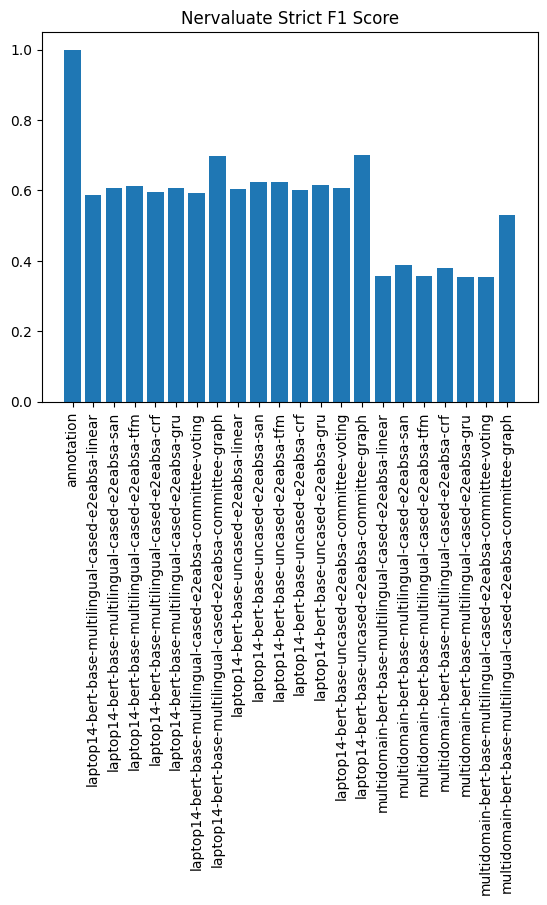

In [14]:
import matplotlib.pyplot as plt
xticks = list(metrics.keys())
x = list(range(len(xticks)))
y = [metrics[x][0]['strict']['f1'] for x in xticks]

fig, ax = plt.subplots(1, 1)
ax.bar(x, y)
ax.set_xticks(x)
ax.set_xticklabels(xticks, rotation='vertical')
plt.title("Nervaluate Strict F1 Score")
plt.show()

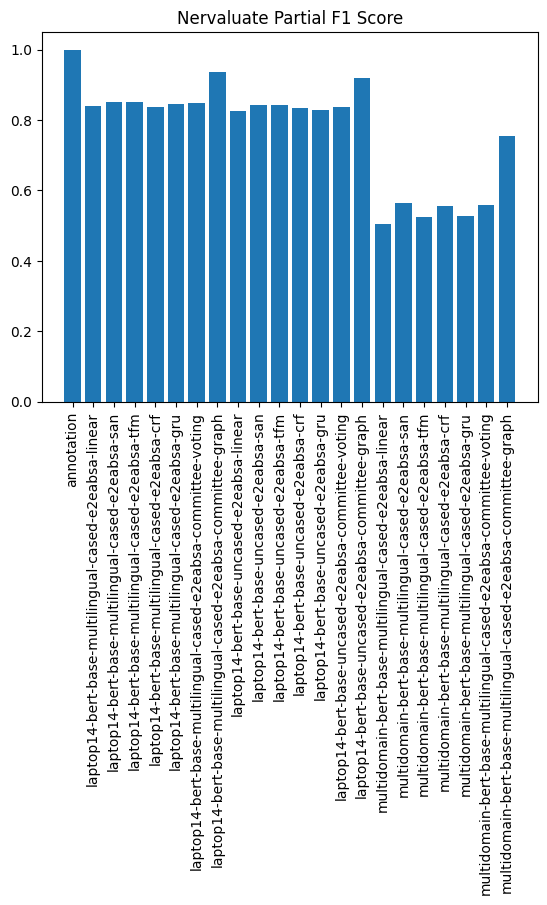

In [15]:
import matplotlib.pyplot as plt
xticks = list(metrics.keys())
x = list(range(len(xticks)))
y = [metrics[x][0]['partial']['f1'] for x in xticks]

fig, ax = plt.subplots(1, 1)
ax.bar(x, y)
ax.set_xticks(x)
ax.set_xticklabels(xticks, rotation='vertical')
plt.title("Nervaluate Partial F1 Score")
plt.show()